# Histograma de los datos climaticos

## Precipitación

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import PurePath
import seaborn as sns

In [2]:
z21_dir = r'data/zafra2021'
z22_dir = r'data/zafra2022'
z23_dir = r'data/zafra2023'

In [4]:
hist_df_21 = pd.DataFrame(columns=['Parcela', 'Lluvia', 'No_lluvia', 'zafra'])

for i in os.listdir(z21_dir):
    if i.endswith('.csv'):
        parcela_id = i.split('.')[0].split('_')[1]
        df = pd.read_csv(PurePath(z21_dir, i))
        lluvia = df.iloc[1, 1]
        no_lluvia = df.iloc[0, 1]

        hist_df_21 = hist_df_21._append({
            'Parcela': int(parcela_id),
            'Lluvia': int(lluvia),
            'No_lluvia': int(no_lluvia),
            'zafra': int(2021)
        }, ignore_index=True)

hist_df_22 = pd.DataFrame(columns=['Parcela', 'Lluvia', 'No_lluvia', 'zafra'])

for i in os.listdir(z22_dir):
    if i.endswith('.csv'):
        parcela_id = i.split('.')[0].split('_')[1]
        df = pd.read_csv(PurePath(z22_dir, i))
        lluvia = df.iloc[1, 1]
        no_lluvia = df.iloc[0, 1]

        hist_df_22 = hist_df_22._append({
            'Parcela': int(parcela_id),
            'Lluvia': int(lluvia),
            'No_lluvia': int(no_lluvia),
            'zafra': int(2022)
        }, ignore_index=True)

hist_df_23 = pd.DataFrame(columns=['Parcela', 'Lluvia', 'No_lluvia', 'zafra'])

for i in os.listdir(z23_dir):
    if i.endswith('.csv'):
        parcela_id = i.split('.')[0].split('_')[1]
        df = pd.read_csv(PurePath(z23_dir, i))
        lluvia = df.iloc[1, 1]
        no_lluvia = df.iloc[0, 1]

        hist_df_23 = hist_df_23._append({
            'Parcela': int(parcela_id),
            'Lluvia': int(lluvia),
            'No_lluvia': int(no_lluvia),
            'zafra': int(2023)
        }, ignore_index=True)

In [5]:
hist_df = pd.concat([hist_df_21, hist_df_22, hist_df_23])

In [6]:
hist_df

,Parcela,Lluvia,No_lluvia,zafra
0,1,268,195,2021
1,10,237,146,2021
2,11,244,169,2021
3,13,262,191,2021
4,14,264,189,2021
5,15,256,197,2021
6,16,244,184,2021
7,2,277,236,2021
8,3,285,213,2021
9,4,426,243,2021


<Figure size 1000x1000 with 0 Axes>

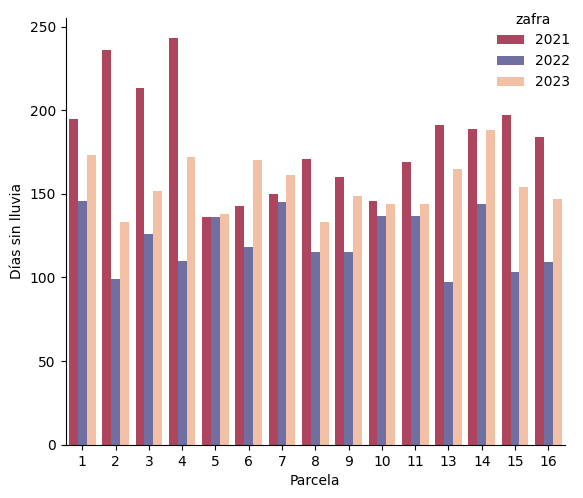

In [26]:
plt.figure(figsize=(10, 10))
a = sns.catplot(data=hist_df, x='Parcela', y='No_lluvia', kind='bar', hue='zafra', legend='auto', palette=sns.color_palette(['#BE3455', '#6667AB', '#FFBE98']))
plt.tight_layout()
plt.xlabel('Parcela')
plt.ylabel('Días sin lluvia')
sns.move_legend(a, loc='upper right')
#plt.savefig('../../tesis_img/sueltas/dias_no_lluvia_all.pdf', dpi=150)
plt.show()

### Correlación con el rendimiento

In [70]:
z21_yield = r'../../results/yield_data/data/zafra21_real.csv'
z22_yield = r'../../results/yield_data/data/zafra22_real.csv'
z23_yield = r'../../results/yield_data/data/zafra23_real.csv'

In [71]:
z21_df = pd.read_csv(z21_yield)
z22_df = pd.read_csv(z22_yield)
z23_df = pd.read_csv(z23_yield)

In [72]:
z21_df_full = pd.merge(hist_df_21[['Parcela', 'Lluvia', 'No_lluvia', 'zafra']], z21_df[['parcela', 'rendimiento']], left_on='Parcela', right_on='parcela')
z22_df_full = pd.merge(hist_df_22[['Parcela', 'Lluvia', 'No_lluvia', 'zafra']], z22_df[['parcela', 'rendimiento']], left_on='Parcela', right_on='parcela')
z23_df_full = pd.merge(hist_df_23[['Parcela', 'Lluvia', 'No_lluvia', 'zafra']], z23_df[['parcela', 'rendimiento']], left_on='Parcela', right_on='parcela')

In [73]:
z21_df_full.drop(z21_df_full[z21_df_full['parcela'] == 4].index, inplace=True)
z23_df_full.drop(z23_df_full[z23_df_full['parcela'] == 1].index, inplace=True)
z23_df_full.drop(z23_df_full[z23_df_full['parcela'] == 6].index, inplace=True)
z23_df_full.drop(z23_df_full[z23_df_full['parcela'] == 14].index, inplace=True)
z23_df_full.drop(z23_df_full[z23_df_full['parcela'] == 16].index, inplace=True)

In [74]:
z_full = pd.concat([z21_df_full, z22_df_full, z23_df_full])

In [80]:
z_full.corr().sort_values(by='rendimiento', ascending=False)

,Parcela,Lluvia,No_lluvia,zafra,parcela,rendimiento
rendimiento,-0.318013,0.142661,0.175978,-0.449076,-0.318013,1.000000
No_lluvia,-0.038120,0.728593,1.000000,-0.398212,-0.038120,0.175978
Lluvia,-0.119001,1.000000,0.728593,-0.411045,-0.119001,0.142661
Parcela,1.000000,-0.119001,-0.038120,-0.057638,1.000000,-0.318013
parcela,1.000000,-0.119001,-0.038120,-0.057638,1.000000,-0.318013
zafra,-0.057638,-0.411045,-0.398212,1.000000,-0.057638,-0.449076


In [56]:
z_full

,Parcela,Lluvia,No_lluvia,zafra,parcela,rendimiento
0,1,268,195,2021,1,70
1,10,237,146,2021,10,80
2,11,244,169,2021,11,80
3,13,262,191,2021,13,65
4,14,264,189,2021,14,75
5,15,256,197,2021,15,75
6,16,244,184,2021,16,40
7,2,277,236,2021,2,75
8,3,285,213,2021,3,60
10,5,217,136,2021,5,80


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_6984\2909847124.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


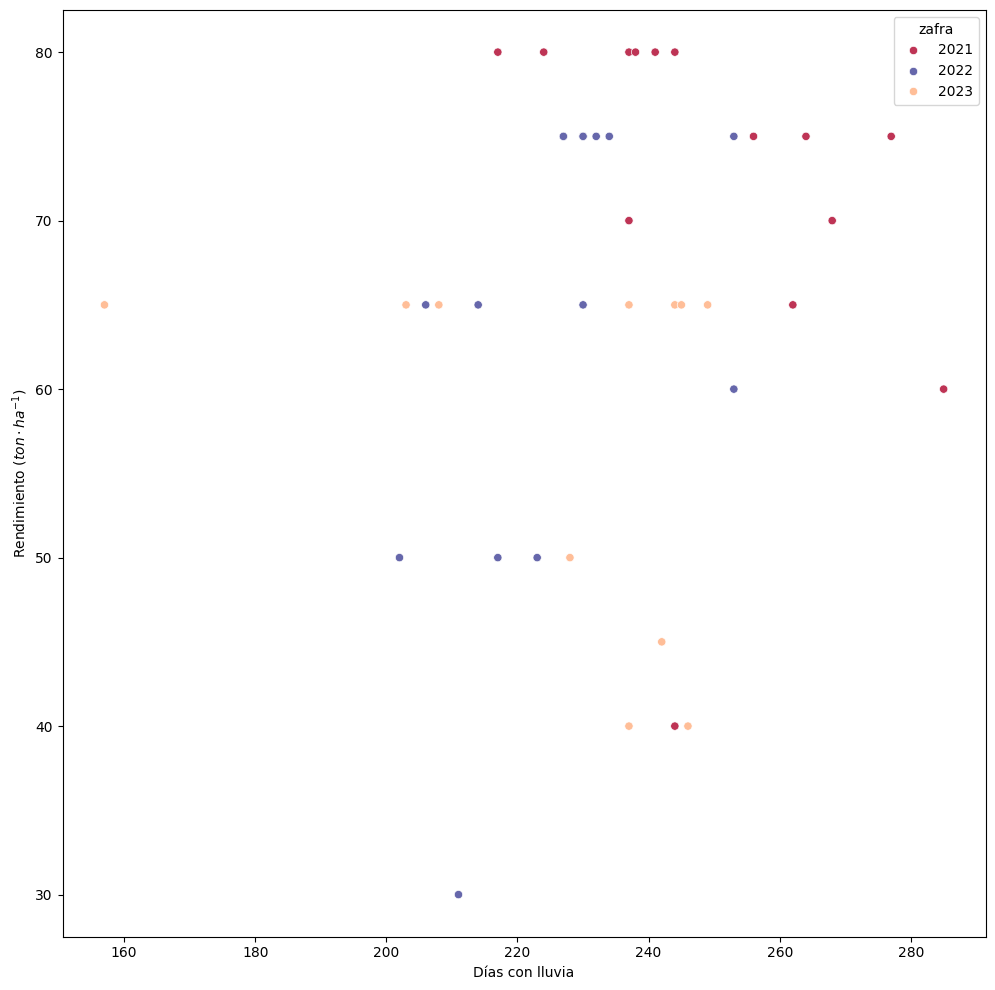

In [68]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=z_full, x='Lluvia', y='rendimiento', hue='zafra', palette=sns.color_palette(['#BE3455', '#6667AB', '#FFBE98']))
plt.tight_layout()
plt.xlabel('Días con lluvia')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
plt.savefig('../../tesis_img/sueltas/dias_lluvia_rendimiento_all.pdf', dpi=150)
plt.show()